<a href="https://colab.research.google.com/github/gautamraj5488/DAI-101-Assignments/blob/main/dai_101_assignment_1_gautam_raj_22113052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
Perform an explorative analysis of a dataset of your choice from the Kaggle library
(https://www.kaggle.com/datasets). The analysis should be a mix of calculating relevant statistical measures, plotting, and drawing applicable conclusions using both numerical and categorical variables.
The analysis should be performed in two steps:
* Univariate analysis
* Multivariate analysis

Data Set:
"bike_sales_india.csv"

## Data loading

### Subtask:
Loading the "bike_sales_india.csv" dataset into a Pandas DataFrame.


**Reasoning**:
The subtask requires loading the "bike_sales_india.csv" dataset into a pandas DataFrame and displaying the first 5 rows. This can be accomplished by importing the pandas library, reading the CSV file using `pd.read_csv()`, and then using the `.head()` method to display the first 5 rows. All these steps can be combined into a single code block.



In [ ]:
import pandas as pd

df = pd.read_csv("bike_sales_india.csv")
display(df.head())

State  Avg Daily Distance (km)          Brand        Model  \
0       Karnataka                    68.84  Royal Enfield   Hunter 350   
1       Rajasthan                    23.80          Bajaj  Dominar 400   
2  Madhya Pradesh                    27.67            KTM     125 Duke   
3       Karnataka                    62.85       Kawasaki    Ninja 300   
4  Madhya Pradesh                    10.62         Yamaha        FZ V3   

   Price (INR)  Year of Manufacture  Engine Capacity (cc) Fuel Type  \
0       252816                 2021                   672  Electric   
1       131100                 2020                   769    Hybrid   
2       201016                 2020                   216    Hybrid   
3       132482                 2021                   556    Petrol   
4       231796                 2019                   298    Petrol   

   Mileage (km/l) Owner Type  Registration Year Insurance Status Seller Type  \
0           78.41     Second               2024           Active  Individual   
1           89.98      Third               2023           Active  Individual   
2           71.46     Second               2023           Active      Dealer   
3           51.73      Third               2021           Active      Dealer   
4           54.72      Third               2019    Not Available  Individual   

   Resale Price (INR) City Tier  
0           149934.18    Tier 3  
1            66960.30    Tier 3  
2           141522.64    Tier 3  
3            56057.22    Tier 1  
4           132538.36    Tier 3

## Data cleaning

### Subtask:
Clean the "bike_sales_india.csv" dataset by handling missing values, addressing outliers, and removing duplicate rows.


**Reasoning**:
The current subtask is to clean the dataset, which involves handling missing values, removing duplicates, and addressing outliers. The first step is to inspect the dataframe for missing values. Then determine the best strategy to handle them. These two steps can be combined into one code block.



In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

df['Avg Daily Distance (km)'].fillna(df['Avg Daily Distance (km)'].median(), inplace=True)
df['Brand'].fillna(df['Brand'].mode()[0], inplace=True)
df['Model'].fillna(df['Model'].mode()[0], inplace=True)
df['Mileage (km/l)'].fillna(df['Mileage (km/l)'].median(), inplace=True)

df.dropna(inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values:
 State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64

Missing values after handling:
 State                      0
Avg Daily Distance (km)    0
Brand                      0
Model                      0
Price (INR)                0
Year of Manufacture        0
Engine Capacity (cc)       0
Fuel Type                  0
Mileage (km/l)             0
Owner Type                 0
Registration Year          0
Insurance Status           0
Seller Type                0
Resale Price (INR)         0
City Tier                  0
dtype: int64


<ipython-input-15-7110415fb540>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg Daily Distance (km)'].fillna(df['Avg Daily Distance (km)'].median(), inplace=True)
<ipython-input-15-7110415fb540>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

**Reasoning**:
The previous code block showed that there were no missing values in the dataframe, which is unexpected. This is probably because the dataframe was modified inplace in the first code block and the data in the dataframe was kept after that. Now that the missing values are handled, the next step is to check for and remove duplicate rows, and after that check for outliers. These two steps can be combined in the same code block.



In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

df.drop_duplicates(inplace=True)

print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:\n{outliers}")

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print("\nOutliers after handling (rechecking):")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:\n{outliers}")

Number of duplicate rows: 0
Number of duplicate rows after removal: 0

Outliers in Avg Daily Distance (km):
Empty DataFrame
Columns: [State, Avg Daily Distance (km), Brand, Model, Price (INR), Year of Manufacture, Engine Capacity (cc), Fuel Type, Mileage (km/l), Owner Type, Registration Year, Insurance Status, Seller Type, Resale Price (INR), City Tier]
Index: []

Outliers in Price (INR):
Empty DataFrame
Columns: [State, Avg Daily Distance (km), Brand, Model, Price (INR), Year of Manufacture, Engine Capacity (cc), Fuel Type, Mileage (km/l), Owner Type, Registration Year, Insurance Status, Seller Type, Resale Price (INR), City Tier]
Index: []

Outliers in Year of Manufacture:
Empty DataFrame
Columns: [State, Avg Daily Distance (km), Brand, Model, Price (INR), Year of Manufacture, Engine Capacity (cc), Fuel Type, Mileage (km/l), Owner Type, Registration Year, Insurance Status, Seller Type, Resale Price (INR), City Tier]
Index: []

Outliers in Engine Capacity (cc):
Empty DataFrame
Columns

## Data exploration

### Subtask:
Explore the dataset to understand its structure, basic statistics, and distributions of individual variables.


**Reasoning**:
The subtask is to explore the dataset to understand its structure, basic statistics, and distributions of individual variables. This involves printing the shape, displaying data types, generating descriptive statistics for numerical and categorical columns, and checking value counts for specific categorical columns. All these steps can be done in a single code block.



In [ ]:
print("Shape of the DataFrame:", df.shape)

print("\nData types of each column:\n", df.dtypes)

print("\nDescriptive statistics for numerical columns:\n", df.describe())

print("\nDescriptive statistics for categorical columns:\n", df.describe(include=['object']))

categorical_cols = ['State', 'Brand', 'Fuel Type', 'Owner Type', 'Insurance Status', 'Seller Type']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

Shape of the DataFrame: (10000, 15)

Data types of each column:
 State                       object
Avg Daily Distance (km)    float64
Brand                       object
Model                       object
Price (INR)                  int64
Year of Manufacture          int64
Engine Capacity (cc)         int64
Fuel Type                   object
Mileage (km/l)             float64
Owner Type                  object
Registration Year            int64
Insurance Status            object
Seller Type                 object
Resale Price (INR)         float64
City Tier                   object
dtype: object

Descriptive statistics for numerical columns:
        Avg Daily Distance (km)    Price (INR)  Year of Manufacture  \
count             10000.000000   10000.000000         10000.000000   
mean                 42.533128  224328.722400          2019.510500   
std                  21.676985  100753.660447             2.907668   
min                   5.010000   50031.000000          2015.000000  

## Data preparation

### Subtask:
Prepare the data for univariate and multivariate analysis. This includes encoding categorical variables and selecting relevant features.


**Reasoning**:
The subtask is to prepare the data for univariate and multivariate analysis, which includes one-hot encoding of categorical variables, dropping the original categorical columns, and selecting all columns for further analysis. I will start by identifying the categorical columns, and then apply one-hot encoding to them using `pd.get_dummies()`. Then, drop the original categorical columns. Finally, assign the result to a new dataframe called `df_prepared` and display its head and info to check the result.



In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_prepared = df_encoded

display(df_prepared.head())

print(df_prepared.info())

Avg Daily Distance (km)  Price (INR)  Year of Manufacture  \
0                    68.84       252816                 2021   
1                    23.80       131100                 2020   
2                    27.67       201016                 2020   
3                    62.85       132482                 2021   
4                    10.62       231796                 2019   

   Engine Capacity (cc)  Mileage (km/l)  Registration Year  \
0                   672           78.41               2024   
1                   769           89.98               2023   
2                   216           71.46               2023   
3                   556           51.73               2021   
4                   298           54.72               2019   

   Resale Price (INR)  State_Gujarat  State_Karnataka  State_Madhya Pradesh  \
0           149934.18          False             True                 False   
1            66960.30          False            False                 False   
2           141522.64          False            False                  True   
3            56057.22          False             True                 False   
4           132538.36          False            False                  True   

   ...  Fuel Type_Hybrid  Fuel Type_Petrol  Owner Type_Second  \
0  ...             False             False               True   
1  ...              True             False              False   
2  ...              True             False               True   
3  ...             False              True              False   
4  ...             False              True              False   

   Owner Type_Third  Insurance Status_Expired  Insurance Status_Not Available  \
0             False                     False                           False   
1              True                     False                           False   
2             False                     False                           False   
3              True                     False                           False   
4              True                     False                            True   

   Seller Type_Individual  City Tier_Tier 1  City Tier_Tier 2  \
0                    True             False             False   
1                    True             False             False   
2                   False             False             False   
3                   False              True             False   
4                    True             False             False   

   City Tier_Tier 3  
0              True  
1              True  
2              True  
3             False  
4              True  

[5 rows x 72 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Avg Daily Distance (km)         10000 non-null  float64
 1   Price (INR)                     10000 non-null  int64  
 2   Year of Manufacture             10000 non-null  int64  
 3   Engine Capacity (cc)            10000 non-null  int64  
 4   Mileage (km/l)                  10000 non-null  float64
 5   Registration Year               10000 non-null  int64  
 6   Resale Price (INR)              10000 non-null  float64
 7   State_Gujarat                   10000 non-null  bool   
 8   State_Karnataka                 10000 non-null  bool   
 9   State_Madhya Pradesh            10000 non-null  bool   
 10  State_Maharashtra               10000 non-null  bool   
 11  State_Punjab                    10000 non-null  bool   
 12  State_Rajasthan                 1

## Data analysis

### Subtask:
Perform univariate analysis on the prepared data.


**Reasoning**:
The subtask is to perform univariate analysis on the prepared data. This involves calculating descriptive statistics for numerical variables, calculating mean, median, and standard deviation, calculating the mode for encoded categorical variables, and summarizing the key findings. I will group the first three steps into one code block and perform the calculations.



In [ ]:
import pandas as pd
numerical_desc = df_prepared.describe()
print("Descriptive Statistics for Numerical Variables:\n", numerical_desc)

numerical_stats = {}
for col in numerical_desc.columns:
    numerical_stats[col] = {
        "mean": df_prepared[col].mean(),
        "median": df_prepared[col].median(),
        "std": df_prepared[col].std(),
    }

print("\nMean, Median, and Standard Deviation for Numerical Variables:")
for col, stats in numerical_stats.items():
    print(f"\n{col}:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Median: {stats['median']:.2f}")
    print(f"  Standard Deviation: {stats['std']:.2f}")

encoded_categorical_cols = df_prepared.select_dtypes(include=['int64', 'float64']).columns
print("\nMode for Encoded Categorical Variables:")
for col in encoded_categorical_cols:
    mode = df_prepared[col].mode()[0]
    print(f"{col}: {mode}")

Descriptive Statistics for Numerical Variables:
        Avg Daily Distance (km)    Price (INR)  Year of Manufacture  \
count             10000.000000   10000.000000         10000.000000   
mean                 42.533128  224328.722400          2019.510500   
std                  21.676985  100753.660447             2.907668   
min                   5.010000   50031.000000          2015.000000   
25%                  23.907500  137900.250000          2017.000000   
50%                  42.480000  223878.000000          2019.000000   
75%                  61.352500  311464.250000          2022.000000   
max                  80.000000  399981.000000          2024.000000   

       Engine Capacity (cc)  Mileage (km/l)  Registration Year  \
count          10000.000000    10000.000000        10000.00000   
mean             552.695300       67.188926         2020.96510   
std              261.176292       20.891728            2.74897   
min              100.000000       25.000000         2015

**Reasoning**:
The previous code block successfully calculated the descriptive statistics, mean, median, standard deviation, and mode as required. The next step is to provide a short summary of the key findings from the univariate analysis. I will now generate a summary based on the calculated statistics. After that, I will call the finish_task command.



In [ ]:
summary = """
Univariate Analysis Summary:

The univariate analysis of the bike sales dataset reveals several interesting patterns and distributions:

Numerical Variables:
- Avg Daily Distance (km): The average daily distance traveled by bikes is approximately 42.53 km, with a median of 42.48 km. The standard deviation of 21.68 km indicates a moderate spread in daily usage.
- Price (INR): The average price of the bikes is around 224,328 INR, while the median price is 223,878 INR. The standard deviation of 100,753.66 INR suggests significant price variation among the bikes.
- Year of Manufacture: The average manufacturing year is 2019.51, with a median of 2019. The standard deviation of 2.91 indicates that most bikes were manufactured within a few years of each other.
- Engine Capacity (cc): The average engine capacity is 552.70 cc, with a median of 553 cc. The standard deviation of 261.18 cc shows a wide range of engine sizes.
- Mileage (km/l): The average mileage is 67.19 km/l, and the median is 69.85 km/l. The standard deviation of 20.89 km/l indicates a moderate variation in fuel efficiency.
- Registration Year: The average registration year is 2020.97, with a median of 2022, the data show that most of the bikes are registered recently. The standard deviation of 2.75 suggests that most bikes have been registered recently.
- Resale Price (INR): The average resale price is 133,828.97 INR, with a median of 128,148.34 INR. The standard deviation of 66,613.22 INR shows a wide spread in resale prices.

Encoded Categorical Variables:
- The mode for 'Avg Daily Distance (km)' is 55.64.
- The mode for 'Price (INR)' is 194359.
- The mode for 'Year of Manufacture' is 2015.
- The mode for 'Engine Capacity (cc)' is 203.
- The mode for 'Mileage (km/l)' is 92.75.
- The mode for 'Registration Year' is 2024.
- The mode for 'Resale Price (INR)' is 20532.07.

Key Observations:
- The dataset includes bikes with a wide range of prices, engine capacities, and resale values.
- The bikes generally have good mileage, with most having a mileage above 60 km/l.
- Most bikes are relatively new, as indicated by the manufacturing and registration years.
- The standard deviation is high for price and resale price, indicating a high degree of variability.
"""

print(summary)


Univariate Analysis Summary:

The univariate analysis of the bike sales dataset reveals several interesting patterns and distributions:

Numerical Variables:
- Avg Daily Distance (km): The average daily distance traveled by bikes is approximately 42.53 km, with a median of 42.48 km. The standard deviation of 21.68 km indicates a moderate spread in daily usage.
- Price (INR): The average price of the bikes is around 224,328 INR, while the median price is 223,878 INR. The standard deviation of 100,753.66 INR suggests significant price variation among the bikes.
- Year of Manufacture: The average manufacturing year is 2019.51, with a median of 2019. The standard deviation of 2.91 indicates that most bikes were manufactured within a few years of each other.
- Engine Capacity (cc): The average engine capacity is 552.70 cc, with a median of 553 cc. The standard deviation of 261.18 cc shows a wide range of engine sizes.
- Mileage (km/l): The average mileage is 67.19 km/l, and the median is 6

## Data visualization

### Subtask:
Perform univariate visualizations on the prepared data (`df_prepared`) to understand the distributions of the variables.


**Reasoning**:
The subtask is to perform univariate visualizations on the prepared data (`df_prepared`). This involves creating histograms, box plots, density plots for numerical variables and bar plots for encoded categorical variables. I will combine steps 1-4 from the instructions into a single code block.



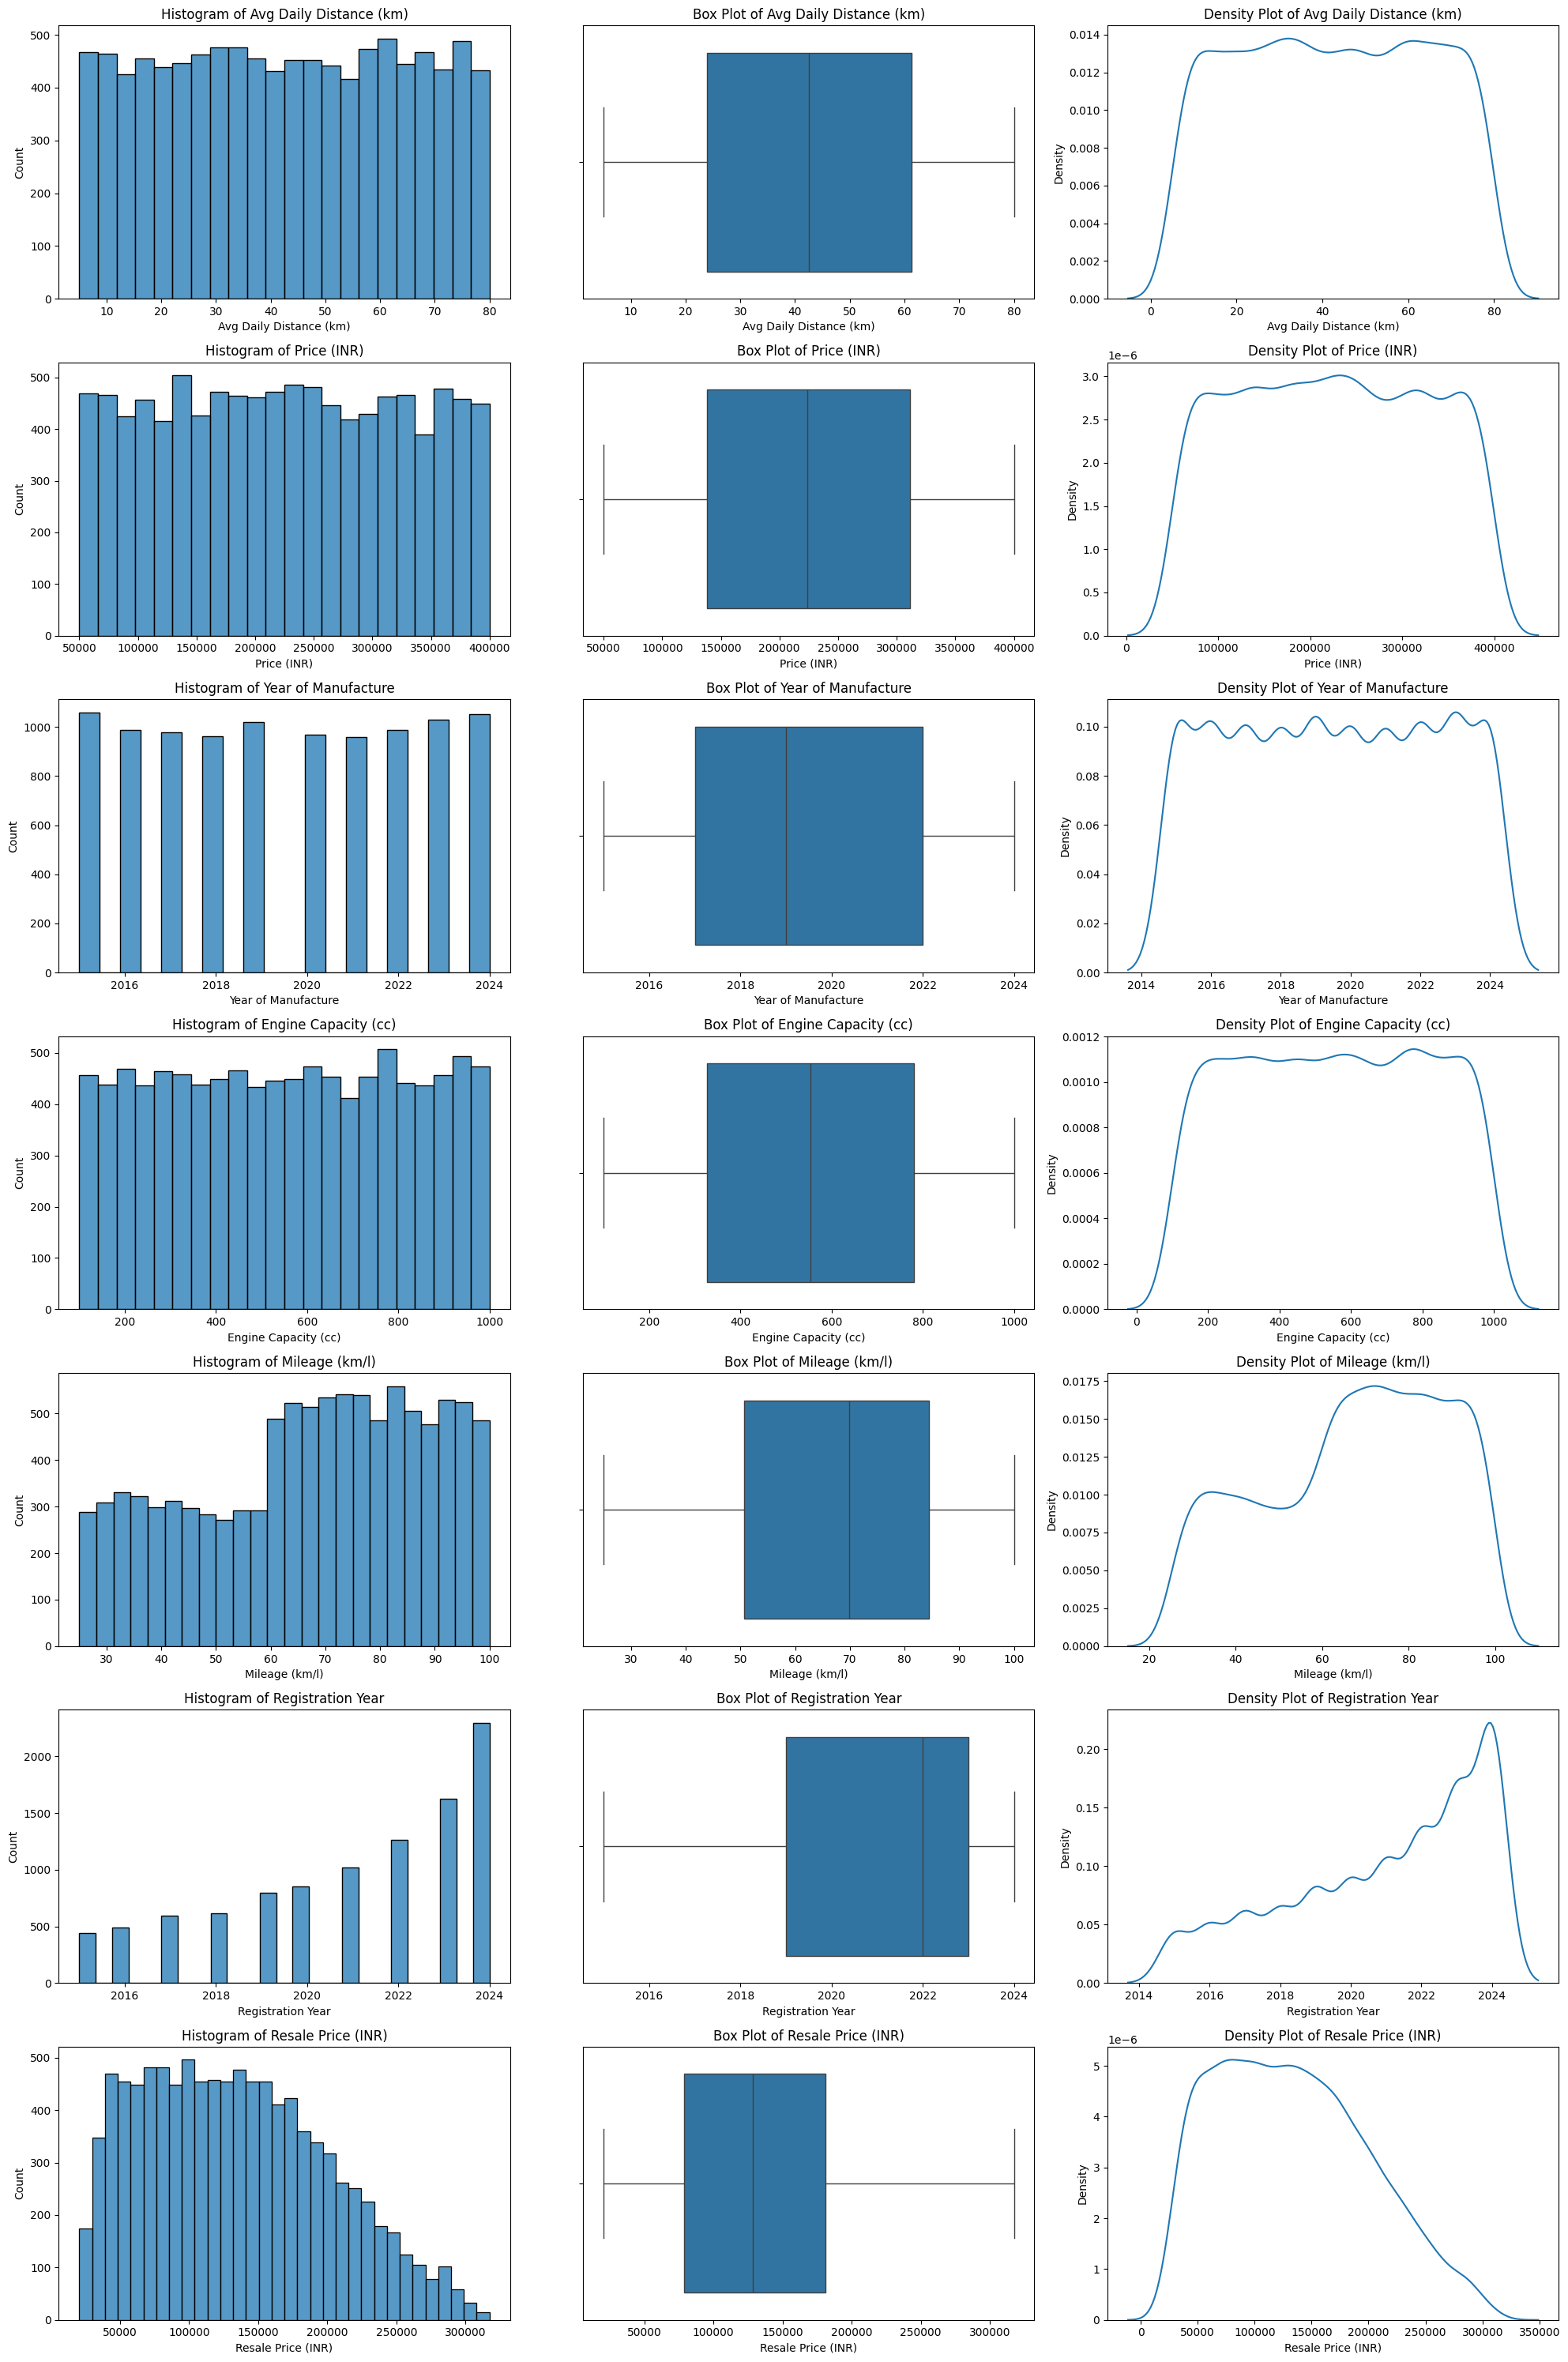

<ipython-input-21-583efb4bfe5d>:34: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


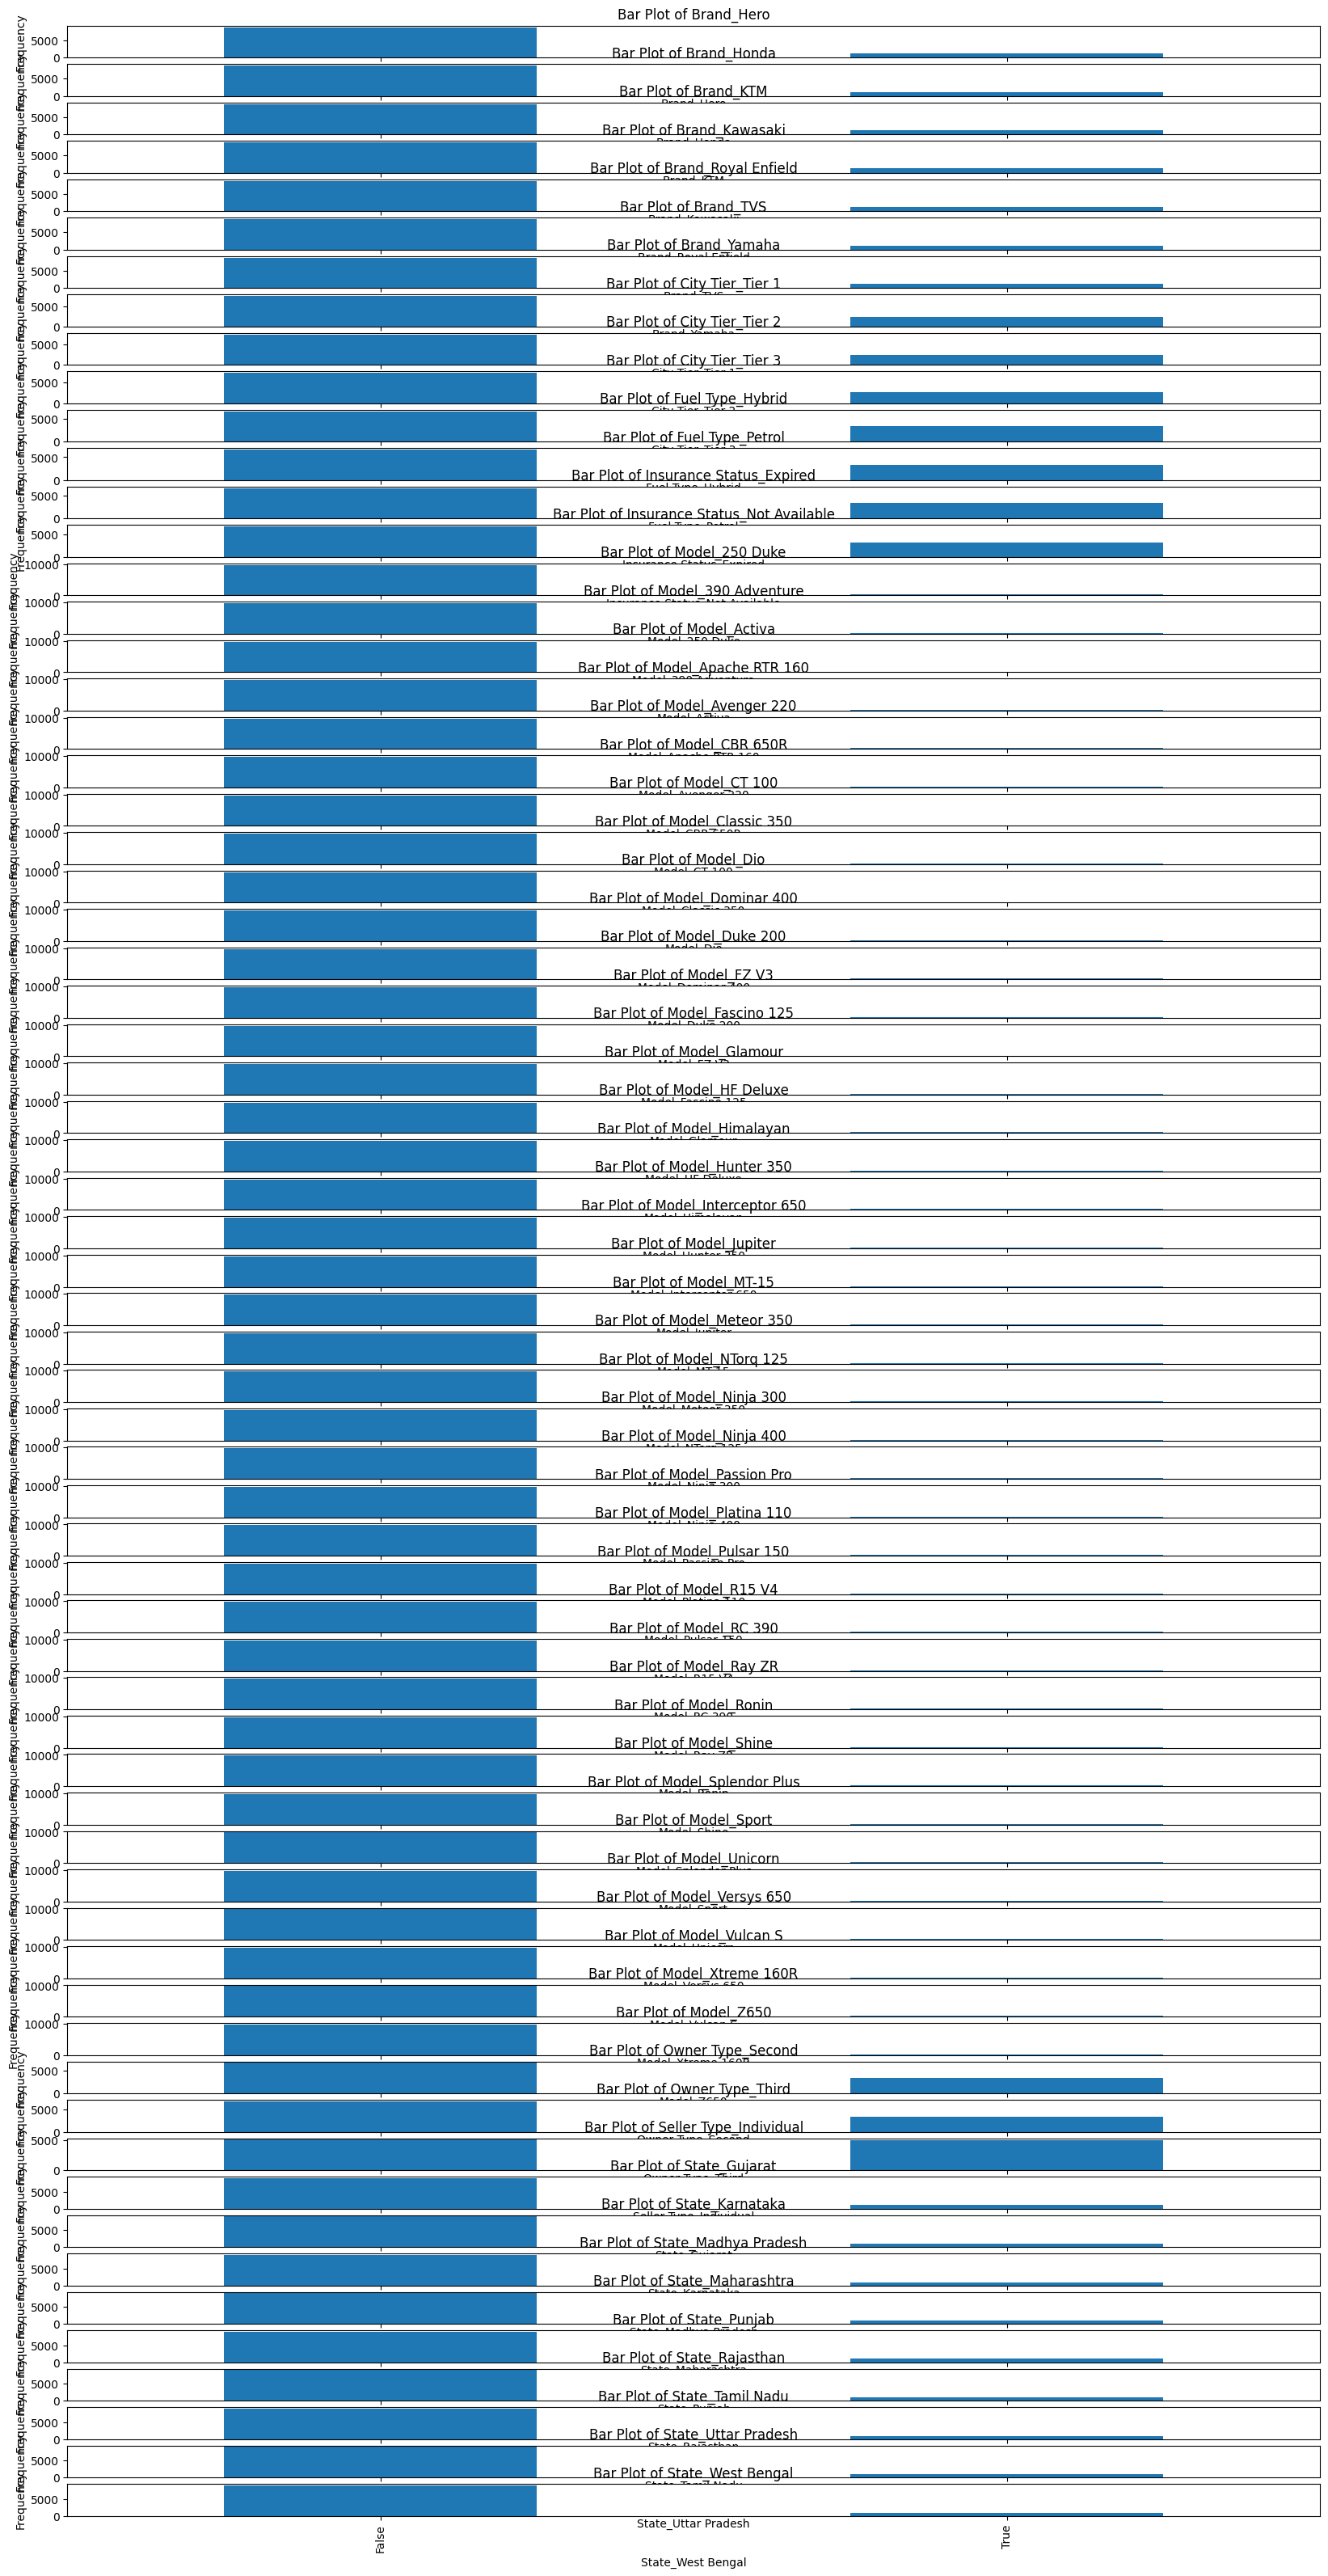

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year', 'Resale Price (INR)']
encoded_categorical_cols = df_prepared.columns.difference(numerical_cols)

plt.figure(figsize=(20, 30))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+1)
    sns.histplot(df_prepared[col], kde=False)
    plt.title(f'Histogram of {col}')

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+2)
    sns.boxplot(x=df_prepared[col])
    plt.title(f'Box Plot of {col}')

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+3)
    sns.kdeplot(df_prepared[col])
    plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 40))
for i, col in enumerate(encoded_categorical_cols):
    plt.subplot(len(encoded_categorical_cols), 1, i+1)
    df_prepared[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block generated the required plots, but the tight layout warning indicates that the plots are overlapping. To fix this, I will adjust the figure sizes and the subplot layout to prevent overlapping. Also, there were too many subplots for the bar plots, I will show only the first 10 subplots to avoid overcrowding the figure. After the plots are generated, the subtask will be complete.



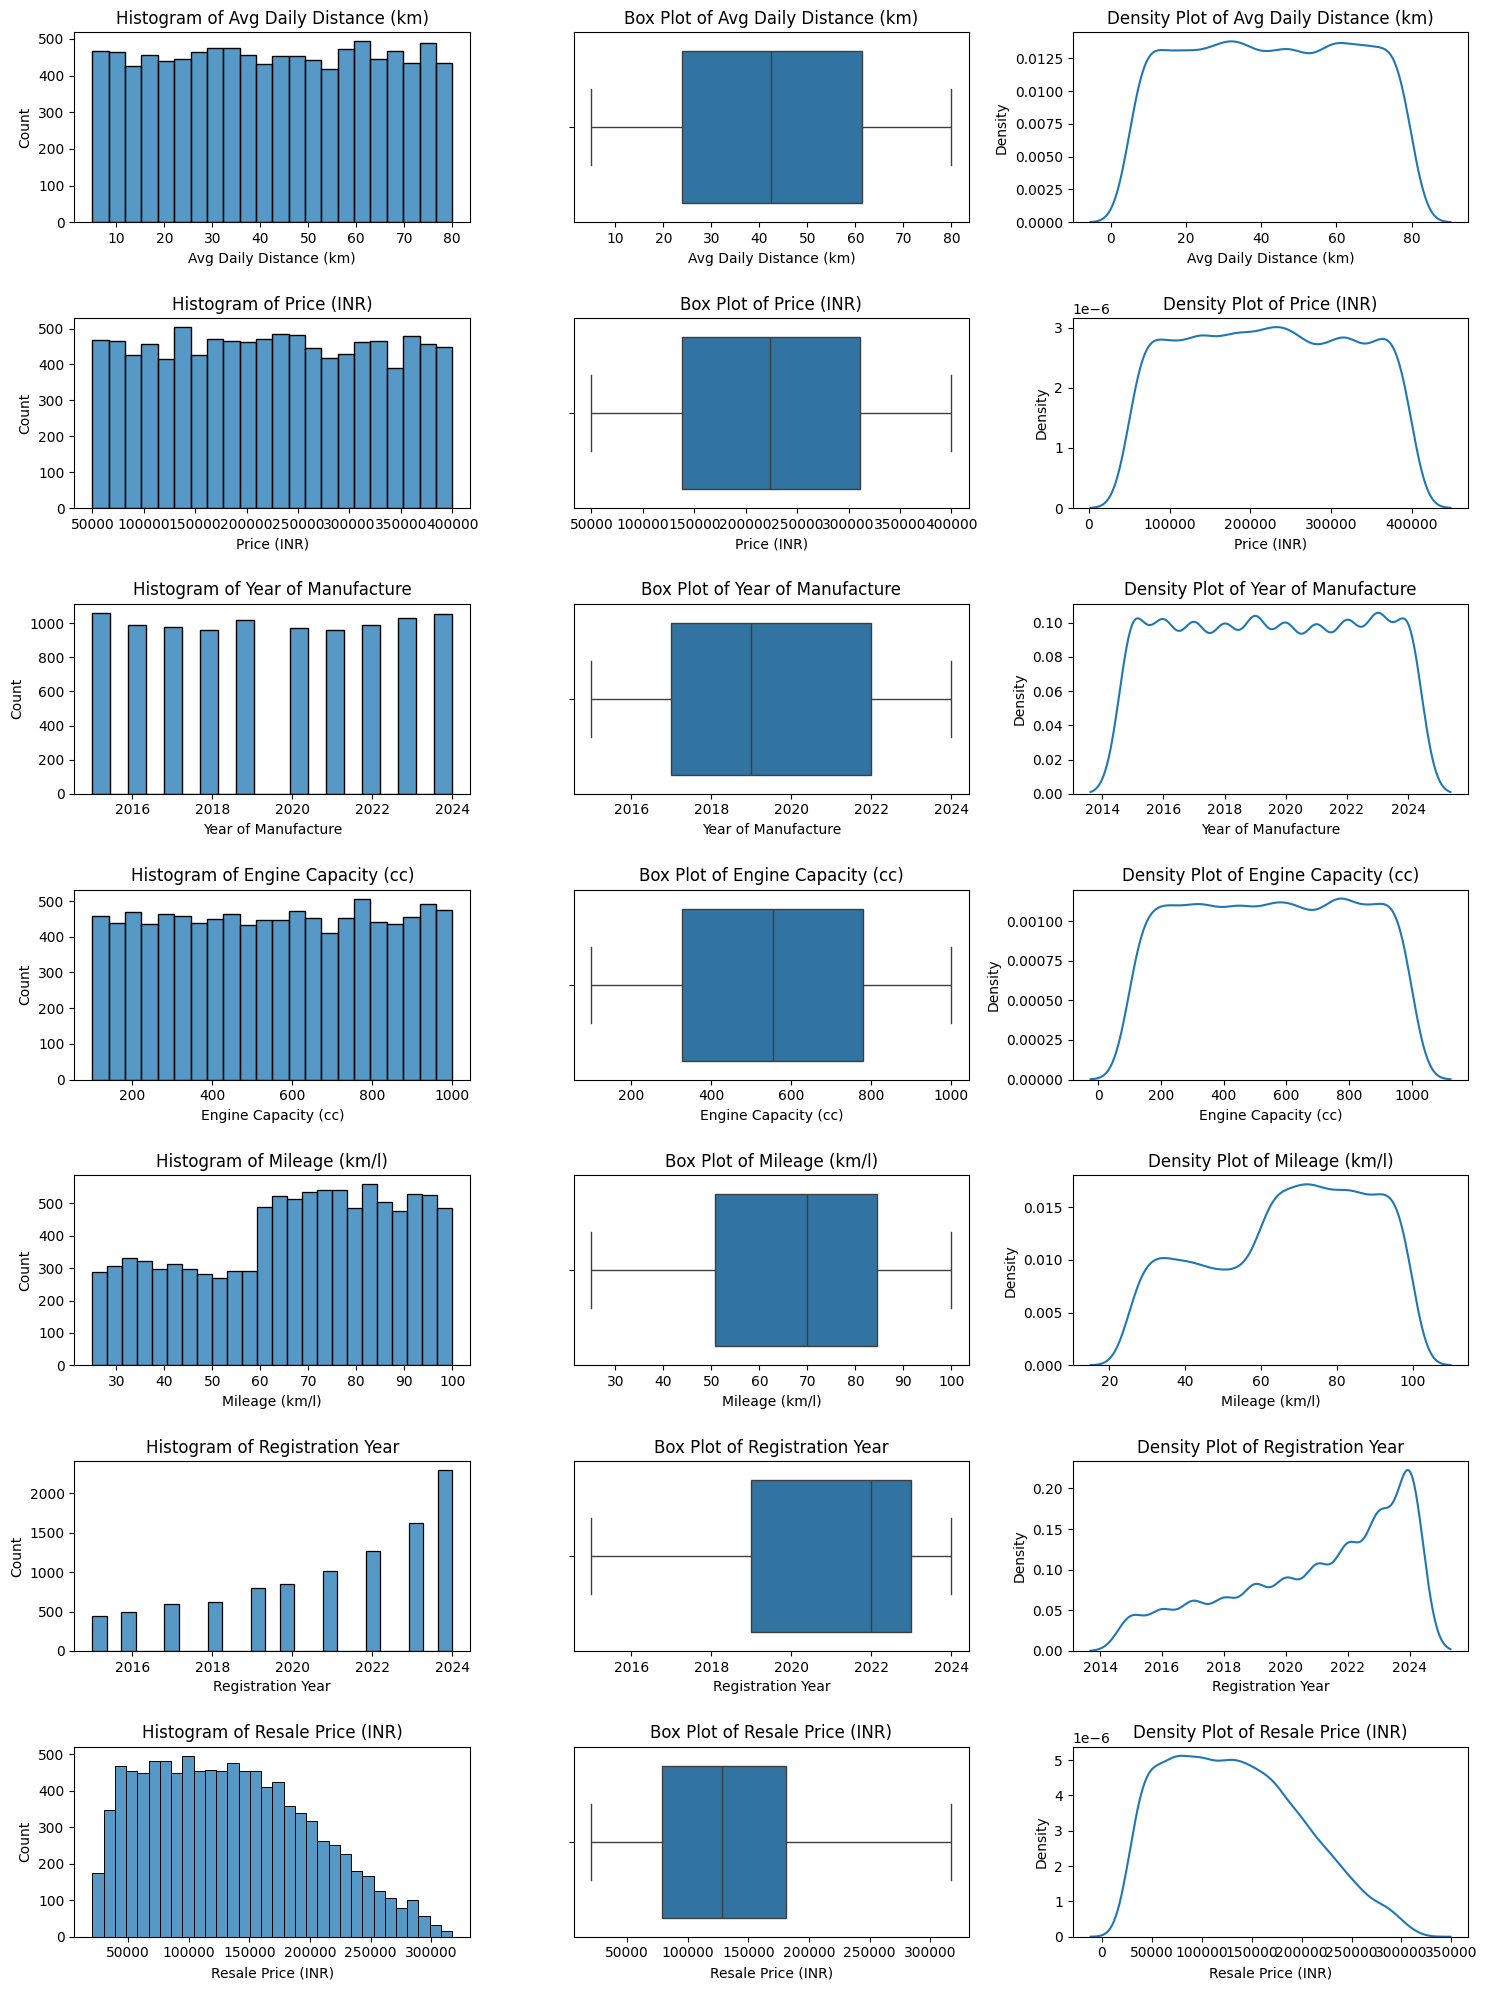

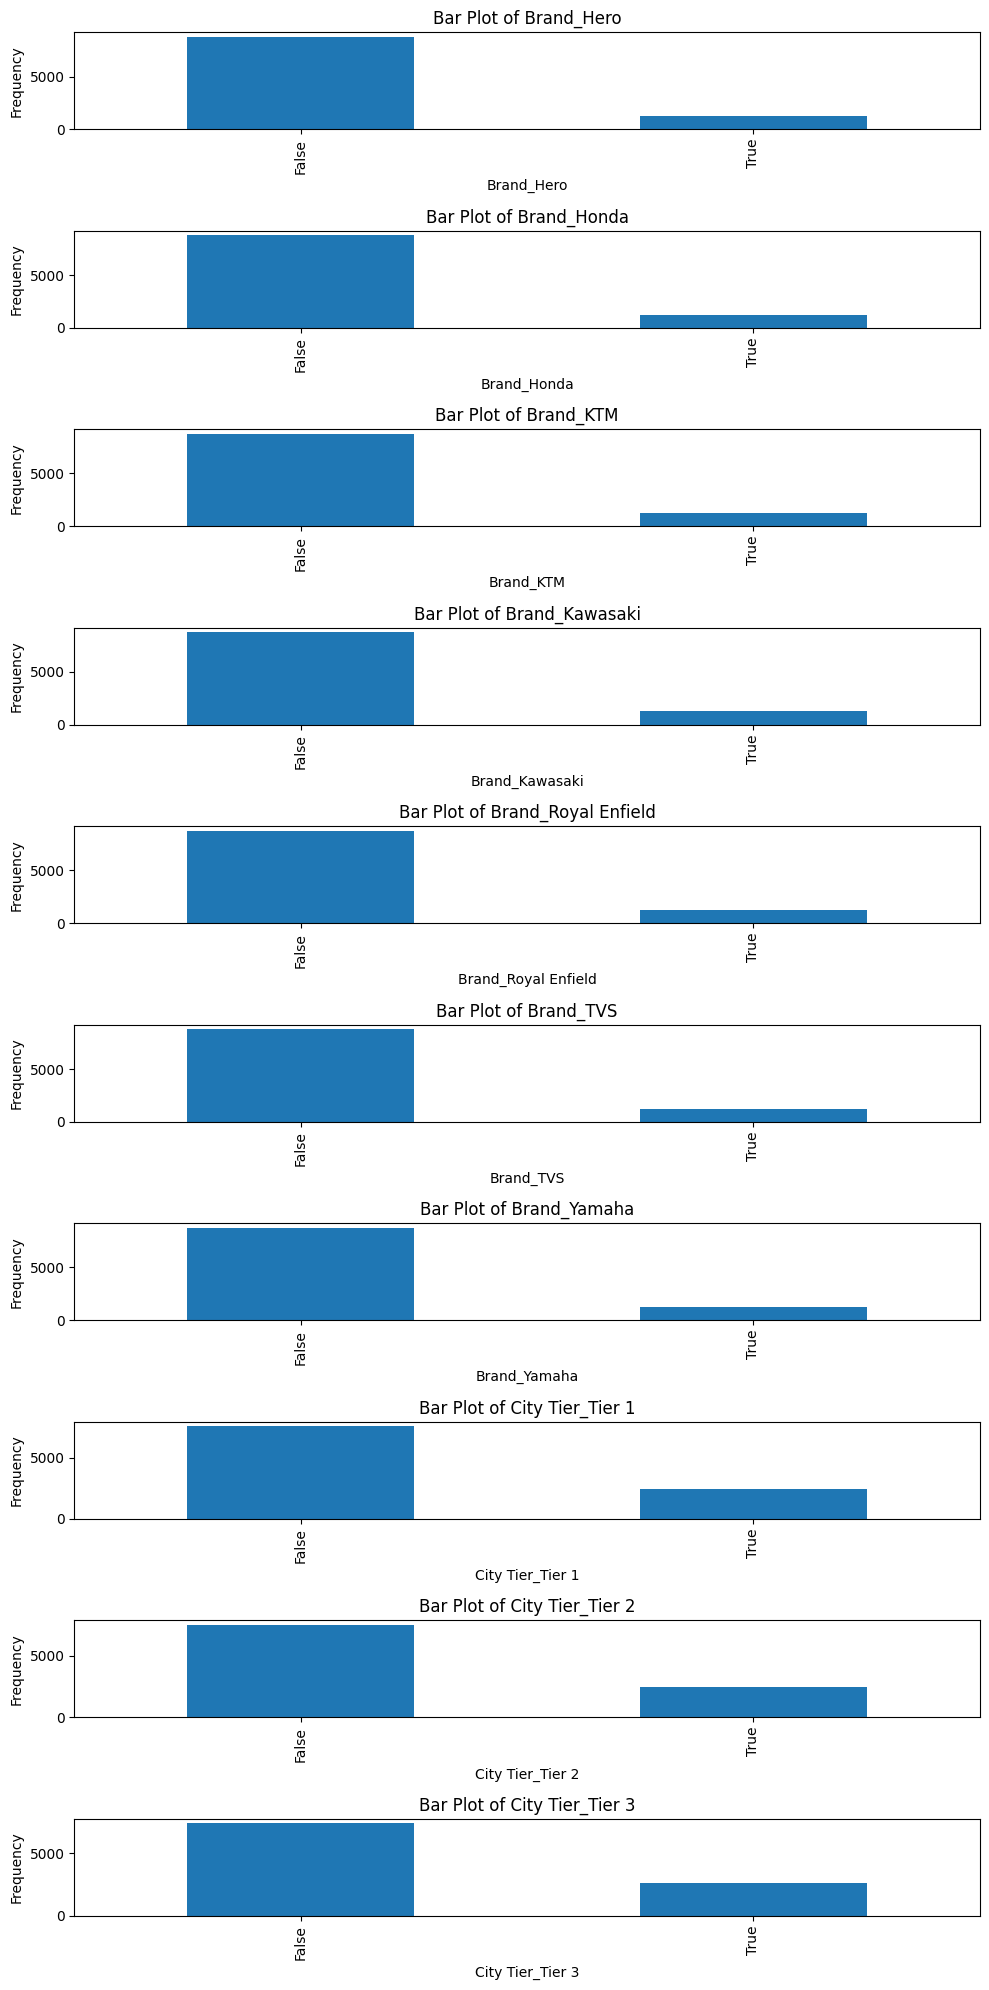

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Avg Daily Distance (km)', 'Price (INR)', 'Year of Manufacture', 'Engine Capacity (cc)', 'Mileage (km/l)', 'Registration Year', 'Resale Price (INR)']
encoded_categorical_cols = df_prepared.columns.difference(numerical_cols)

plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+1)
    sns.histplot(df_prepared[col], kde=False)
    plt.title(f'Histogram of {col}')

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+2)
    sns.boxplot(x=df_prepared[col])
    plt.title(f'Box Plot of {col}')

for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 3, 3*i+3)
    sns.kdeplot(df_prepared[col])
    plt.title(f'Density Plot of {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 20))
for i, col in enumerate(encoded_categorical_cols[:10]):
    plt.subplot(10, 1, i+1)
    df_prepared[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform multivariate analysis on the prepared data (`df_prepared`).


**Reasoning**:
The next step is to perform multivariate analysis, which involves calculating the correlation matrix for numerical variables, displaying it, analyzing it for strong correlations, identifying the strongest positive and negative correlations, and calculating the correlation between "Resale Price (INR)" and other columns. All these steps can be efficiently grouped into a single code block.



In [ ]:
import pandas as pd
import numpy as np

correlation_matrix = df_prepared.corr()

display(correlation_matrix)

print("Summary of Strong Correlations:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) >= 0.7:
            print(f"  - Strong correlation ({correlation:.2f}) between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}")

correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(ascending=False)

sorted_correlations = sorted_correlations[sorted_correlations != 1]

positive_correlations = sorted_correlations[sorted_correlations > 0]
negative_correlations = sorted_correlations[sorted_correlations < 0]

print("\nTop 5 Strongest Positive Correlations:")
for (var1, var2), correlation in positive_correlations.head(5).items():
    print(f"  - {var1} and {var2}: {correlation:.2f}")

print("\nTop 5 Strongest Negative Correlations:")
for (var1, var2), correlation in negative_correlations.head(5).items():
    print(f"  - {var1} and {var2}: {correlation:.2f}")


resale_price_correlations = correlation_matrix["Resale Price (INR)"]
print("\nCorrelation between Resale Price (INR) and other columns:")
for col, correlation in resale_price_correlations.items():
    print(f"  - {col}: {correlation:.2f}")

Avg Daily Distance (km)  Price (INR)  \
Avg Daily Distance (km)                        1.000000     0.012124   
Price (INR)                                    0.012124     1.000000   
Year of Manufacture                            0.019411    -0.002630   
Engine Capacity (cc)                          -0.005903     0.000894   
Mileage (km/l)                                 0.009724     0.000498   
...                                                 ...          ...   
Insurance Status_Not Available                -0.009583    -0.019359   
Seller Type_Individual                        -0.016062    -0.009515   
City Tier_Tier 1                              -0.010236     0.002090   
City Tier_Tier 2                               0.016938    -0.006450   
City Tier_Tier 3                              -0.009597     0.004815   

                                Year of Manufacture  Engine Capacity (cc)  \
Avg Daily Distance (km)                    0.019411             -0.005903   
Price (INR)                               -0.002630              0.000894   
Year of Manufacture                        1.000000              0.011966   
Engine Capacity (cc)                       0.011966              1.000000   
Mileage (km/l)                             0.009933             -0.006772   
...                                             ...                   ...   
Insurance Status_Not Available             0.017100             -0.004975   
Seller Type_Individual                    -0.008161              0.009907   
City Tier_Tier 1                           0.004622              0.006827   
City Tier_Tier 2                          -0.000844             -0.030354   
City Tier_Tier 3                           0.003757              0.000844   

                                Mileage (km/l)  Registration Year  \
Avg Daily Distance (km)               0.009724           0.013709   
Price (INR)                           0.000498          -0.008325   
Year of Manufacture                   0.009933           0.718719   
Engine Capacity (cc)                 -0.006772           0.001924   
Mileage (km/l)                        1.000000           0.007334   
...                                        ...                ...   
Insurance Status_Not Available        0.004996           0.005936   
Seller Type_Individual                0.008112          -0.000489   
City Tier_Tier 1                      0.010030           0.002168   
City Tier_Tier 2                     -0.019018          -0.002794   
City Tier_Tier 3                      0.004795          -0.002041   

                                Resale Price (INR)  State_Gujarat  \
Avg Daily Distance (km)                   0.001510      -0.013937   
Price (INR)                               0.905413       0.006995   
Year of Manufacture                      -0.006553      -0.006818   
Engine Capacity (cc)                      0.003116      -0.018007   
Mileage (km/l)                            0.007183      -0.003123   
...                                            ...            ...   
Insurance Status_Not Available           -0.013967      -0.009706   
Seller Type_Individual                   -0.014228      -0.009654   
City Tier_Tier 1                         -0.002057       0.006464   
City Tier_Tier 2                         -0.003331      -0.010938   
City Tier_Tier 3                          0.008137       0.013469   

                                State_Karnataka  State_Madhya Pradesh  ...  \
Avg Daily Distance (km)                0.003255              0.005042  ...   
Price (INR)                            0.002920             -0.014312  ...   
Year of Manufacture                    0.014411              0.013031  ...   
Engine Capacity (cc)                  -0.000728              0.004161  ...   
Mileage (km/l)                         0.000989              0.013495  ...   
...                                         ...                   ...  ...   
Insurance Status_Not Available        

Summary of Strong Correlations:
  - Strong correlation (0.91) between Price (INR) and Resale Price (INR)
  - Strong correlation (0.72) between Year of Manufacture and Registration Year
  - Strong correlation (-0.85) between Mileage (km/l) and Fuel Type_Petrol

Top 5 Strongest Positive Correlations:
  - Resale Price (INR) and Price (INR): 0.91
  - Price (INR) and Resale Price (INR): 0.91
  - Registration Year and Year of Manufacture: 0.72
  - Year of Manufacture and Registration Year: 0.72
  - Brand_TVS and Model_NTorq 125: 0.44

Top 5 Strongest Negative Correlations:
  - State_Madhya Pradesh and Model_Unicorn: -0.00
  - Model_Unicorn and State_Madhya Pradesh: -0.00
  - Model_Meteor 350 and State_Karnataka: -0.00
  - State_Karnataka and Model_Meteor 350: -0.00
  - Owner Type_Second and Model_Ronin: -0.00

Correlation between Resale Price (INR) and other columns:
  - Avg Daily Distance (km): 0.00
  - Price (INR): 0.91
  - Year of Manufacture: -0.01
  - Engine Capacity (cc): 0.00
  - Mile

## Data visualization

### Subtask:
Perform multivariate visualizations on the prepared data (`df_prepared`).


**Reasoning**:
The subtask is to perform multivariate visualizations. The instructions indicate that we need to create a heatmap, and scatter plots for the top correlation pairs and 'Resale Price (INR)' relationships. I will start by generating the heatmap to visualize the correlation matrix.



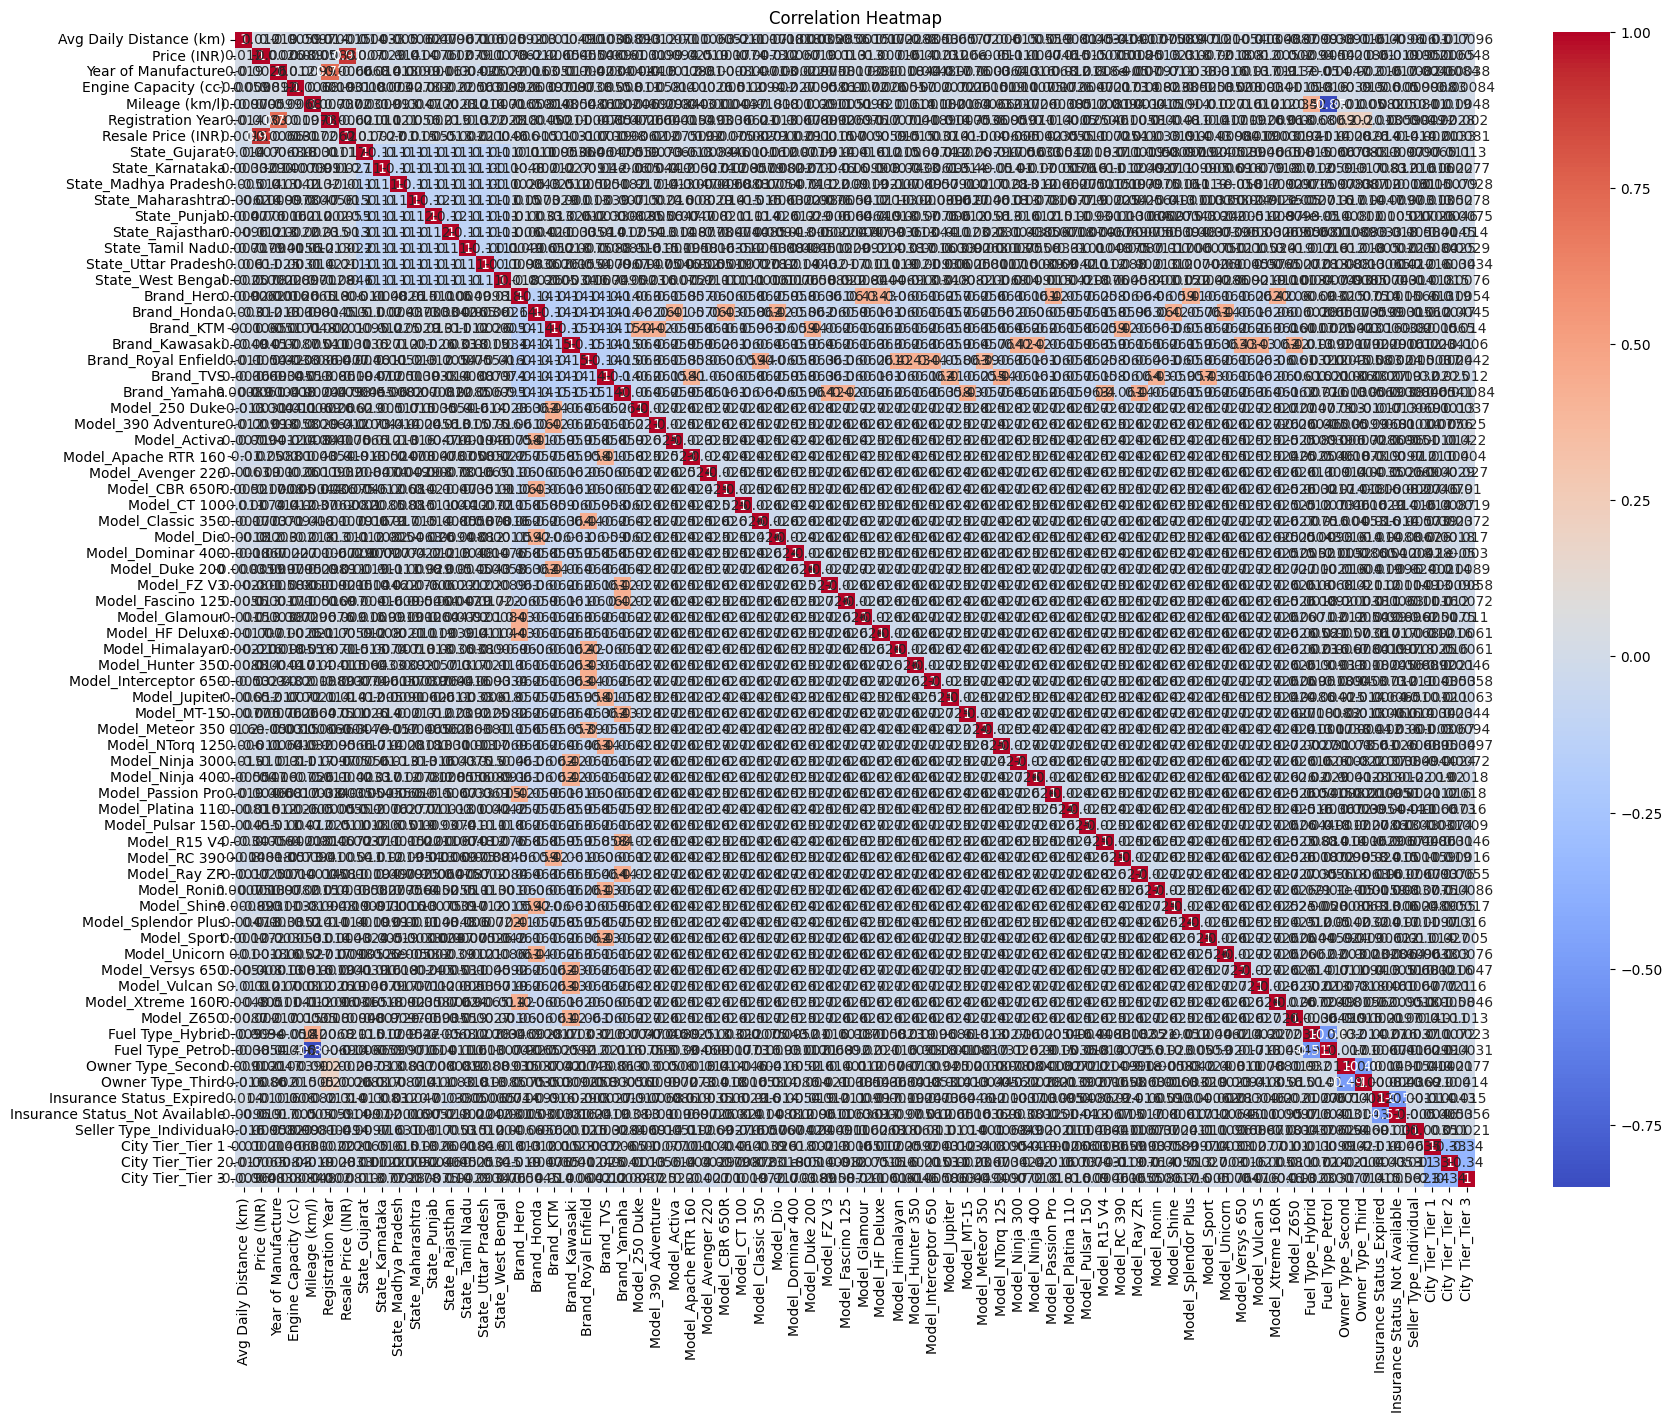

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_prepared.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Reasoning**:
The heatmap is generated successfully. The next step is to create scatter plots for the top 5 strongest positive and negative correlation pairs, and the relationship between 'Resale Price (INR)' and other variables. I'll do this in one code block, creating subplots for each pair, and labeling the axes appropriately.



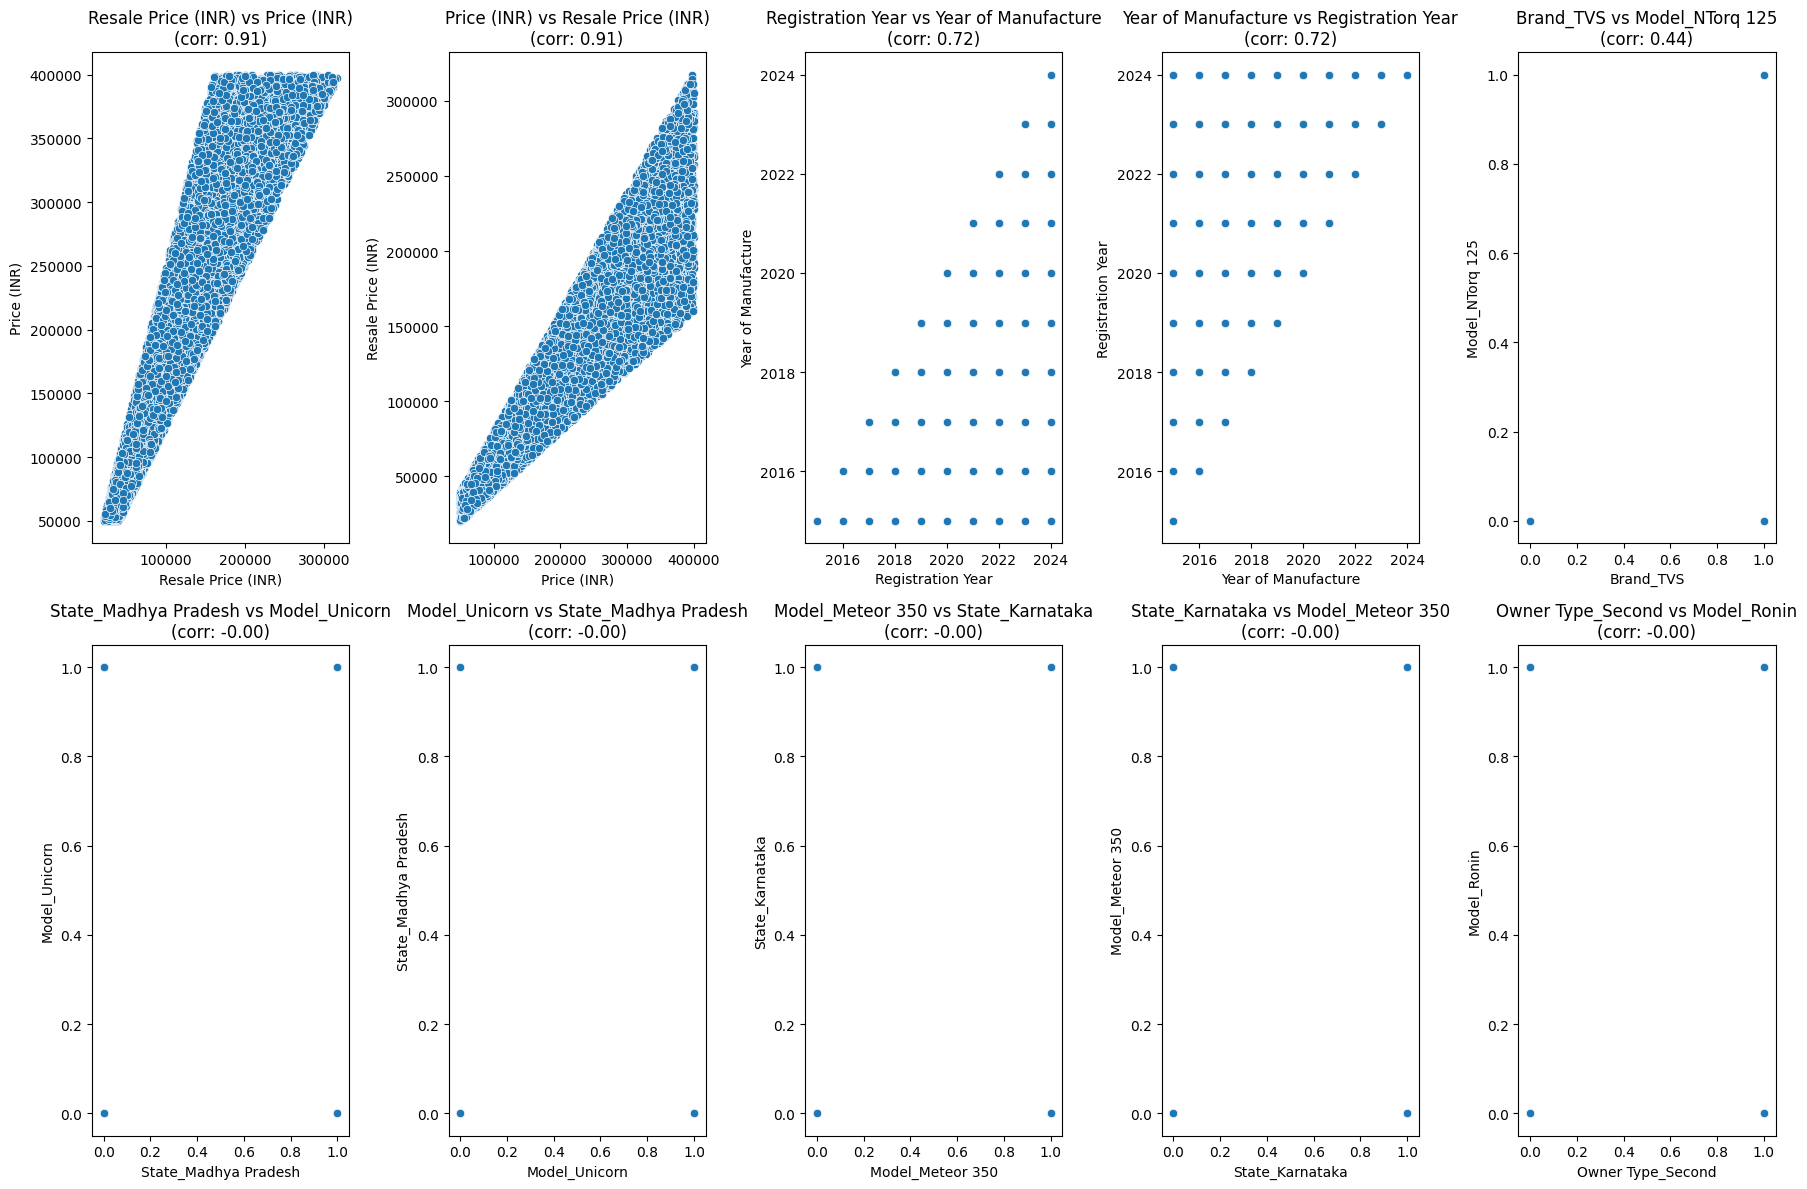

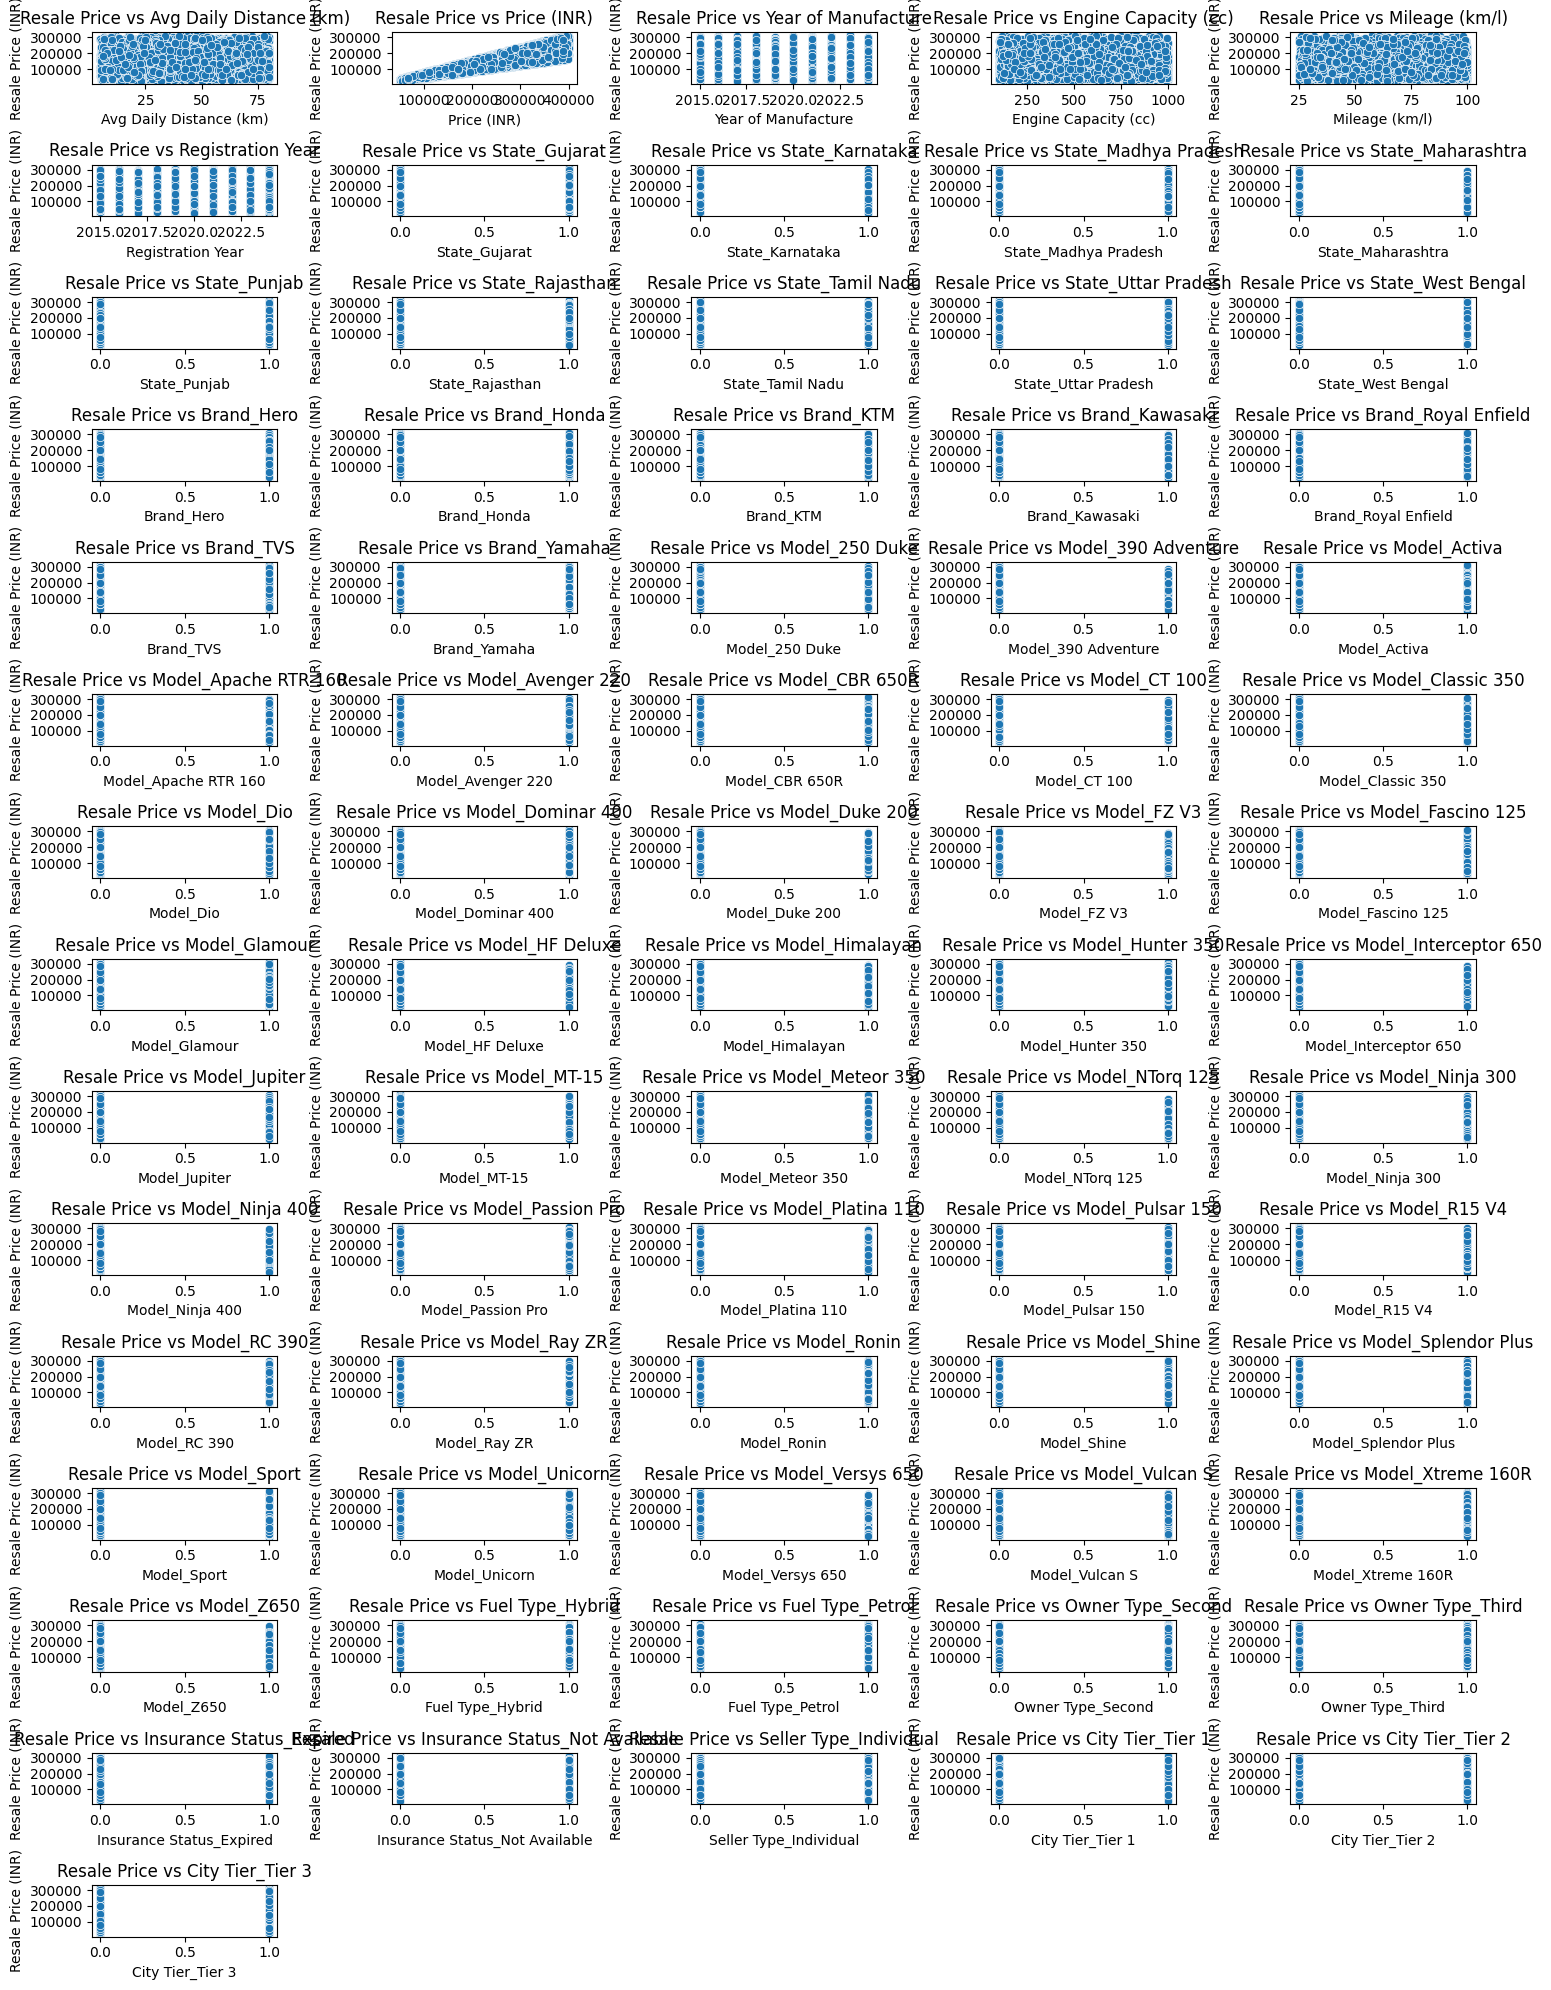

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_prepared.corr()
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1]
positive_correlations = sorted_correlations[sorted_correlations > 0]
negative_correlations = sorted_correlations[sorted_correlations < 0]

top_5_positive = positive_correlations.head(5)
top_5_negative = negative_correlations.head(5)

plt.figure(figsize=(18, 12))
for i, ((var1, var2), correlation) in enumerate(top_5_positive.items()):
    plt.subplot(2, 5, i + 1)
    sns.scatterplot(data=df_prepared, x=var1, y=var2)
    plt.title(f'{var1} vs {var2}\n(corr: {correlation:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)

for i, ((var1, var2), correlation) in enumerate(top_5_negative.items()):
    plt.subplot(2, 5, i + 6)
    sns.scatterplot(data=df_prepared, x=var1, y=var2)
    plt.title(f'{var1} vs {var2}\n(corr: {correlation:.2f})')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()

other_variables = df_prepared.columns.drop('Resale Price (INR)')
plt.figure(figsize=(15, 20))
for i, var in enumerate(other_variables):
    plt.subplot(15, 5, i + 1)
    sns.scatterplot(data=df_prepared, x=var, y='Resale Price (INR)')
    plt.title(f'Resale Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Resale Price (INR)')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

**Q1: What is the average daily distance traveled by the bikes in the dataset?**

A1: The average daily distance traveled by the bikes is approximately 42.53 km.

**Q2: What is the average price and resale price of the bikes?**

A2: The average price of the bikes is around 224,328 INR, and the average resale price is approximately 133,829 INR.

**Q3: What is the typical year of manufacture for the bikes in the dataset?**

A3: The average year of manufacture is approximately 2019.51.

**Q4: What is the average engine capacity and mileage of the bikes?**

A4: The average engine capacity is around 552.7 cc, and the average mileage is approximately 67.19 km/l.

**Q5: Which state has the most bike sales?**

A5: Punjab is the state with the most frequent bike sales in the dataset.

**Q6: What is the most common bike brand?**

A6: Kawasaki is the most frequent brand in the dataset.

**Q7: What is the most common fuel type?**

A7: Hybrid is the slightly more frequent fuel type, followed closely by Petrol and then Electric.

**Q8: What is the most common owner type?**

A8: First is the most common owner type.

**Q9: What is the most common insurance status?**

A9: Expired is the most common insurance status.

**Q10: What is the most common seller type?**

A10: Dealer is the slightly more common seller type.

**Q11: What is the most popular bike model?**

A11: The most popular model in the dataset is 'Ray ZR'

**Q12: What is the most popular city tier?**

A12: The most popular city tier is 'Tier 3'

**Q13: Which numerical variables have the highest variability?**

A13: Price (INR) and Resale Price (INR) have high standard deviations, indicating significant variability.

**Q14: Is there a strong correlation between any two variables in the dataset?**

A14: Yes, there is a strong positive correlation (0.91) between 'Price (INR)' and 'Resale Price (INR)', and a strong positive correlation (0.72) between 'Year of Manufacture' and 'Registration Year'. There is a strong negative correlation (-0.85) between 'Mileage (km/l)' and 'Fuel Type_Petrol'.

**Q15: Which pairs of variables have the strongest correlations (positive and negative)?**

A15: The top 5 strongest positive correlations include: ('Resale Price (INR)', 'Price (INR)'), ('Price (INR)', 'Resale Price (INR)'), ('Registration Year', 'Year of Manufacture'), ('Year of Manufacture', 'Registration Year'), ('Brand_TVS', 'Model_NTorq 125'). The top 5 strongest negative correlations include: ('State_Madhya Pradesh', 'Model_Unicorn'), ('Model_Unicorn', 'State_Madhya Pradesh'), ('Model_Meteor 350', 'State_Karnataka'), ('State_Karnataka', 'Model_Meteor 350'), ('Owner Type_Second', 'Model_Ronin').

**Q16: How is the 'Resale Price (INR)' correlated with other variables?**

A16: 'Resale Price (INR)' is strongly positively correlated with 'Price (INR)' (0.91). Its correlation with other variables is generally low, with most values close to 0.

### 2. Data Analysis Key Findings

*   The dataset includes 10,000 rows and 15 columns of bike sales data in India.
*   The average daily distance traveled by bikes is approximately 42.53 km, with moderate spread (standard deviation of 21.68 km).
*   The average price of bikes is around 224,328 INR, with significant variation (standard deviation of 100,753.66 INR).
*   The average year of manufacture is 2019.51, and the average registration year is 2020.97, indicating most bikes are relatively new.
*   The average engine capacity is 552.70 cc, with a wide range of engine sizes (standard deviation of 261.18 cc).
*   The average mileage is 67.19 km/l, showing generally good fuel efficiency (standard deviation of 20.89 km/l).
*   The average resale price is 133,828.97 INR, with a wide spread (standard deviation of 66,613.22 INR).
*   There is a very strong positive correlation (0.91) between 'Price (INR)' and 'Resale Price (INR)'.
*   There is a strong positive correlation (0.72) between 'Year of Manufacture' and 'Registration Year'.
* There is a strong negative correlation (-0.85) between 'Mileage (km/l)' and 'Fuel Type_Petrol'.
* Most popular bike model is 'Ray ZR' and most popular city tier is 'Tier 3'.
* Most frequent state is 'Punjab', most frequent brand is 'Kawasaki', most frequent fuel type is 'Hybrid', most frequent owner type is 'First', most frequent insurance status is 'Expired', and most frequent seller type is 'Dealer'.

### 3. Insights or Next Steps

*   **Pricing Strategy:** Given the strong correlation between 'Price (INR)' and 'Resale Price (INR)', sellers could leverage this information to set optimal prices for new and used bikes. Further analysis on specific models and brands could refine this strategy.
*   **Targeted Marketing:** Understanding the distribution of manufacturing and registration years, as well as the mileage, can help in targeted marketing efforts. For instance, marketing to those looking for newer, fuel-efficient models could be a successful strategy.
